In [1]:
import folium
import pandas as pd
import numpy as np
import json
import re

import seaborn as sns
from IPython.display import Image
import matplotlib.pyplot as plt

In [2]:
# 한글 폰트 문제 해결
import platform

from matplotlib import font_manager, rc
# plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')

# 도서나루 EDA

In [3]:
# 빅데이터 마켓 페이지에서 추출함
NL_CD_LIBRARY_202106 = pd.read_csv('C:/Users/user/Desktop/도서나루/NL_CD_LIBRARY_202106.csv')

In [4]:
print(NL_CD_LIBRARY_202106.columns)
print(NL_CD_LIBRARY_202106.shape)

Index(['lib_code', 'lib_name', 'addr', 'lib_latitude', 'lib_longitude',
       'address1', 'address2', 'lib_sign', 'api_lib_sign', 'tel', 'fax',
       'homepage', 'operatingTime', 'closedOn', 'lib_type', 'lib_type_nm',
       'establish', 'open_year', 'zipcode', 'lib_utmk_x', 'lib_utmk_y',
       'first_loan_year', 'part_year', 'master_lib_code', 'lib_alias', 'code',
       'locate_code', 'addr_old', 'lib_name_nl', 'lib_name_origin', 'main_lib',
       'areacode1', 'areacode2', 'wd_area_code'],
      dtype='object')
(1204, 34)


In [5]:
print('전국 공공 도서관 + 작은 도서관 :', NL_CD_LIBRARY_202106.shape)

전국 공공 도서관 + 작은 도서관 : (1204, 34)


In [6]:
print('전국 공공 도서관', NL_CD_LIBRARY_202106[NL_CD_LIBRARY_202106['lib_type_nm']=='공공'].shape)

전국 공공 도서관 (848, 34)


# 1. 전국 공공도서관 개수

In [7]:
total = NL_CD_LIBRARY_202106[NL_CD_LIBRARY_202106['lib_type_nm']=='공공']
print('전국 공공 도서관 :', total.shape[0])

전국 공공 도서관 : 848


In [8]:
total['areacode1'].unique() == total['address1'].unique()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True])

<AxesSubplot:xlabel='address1', ylabel='count'>

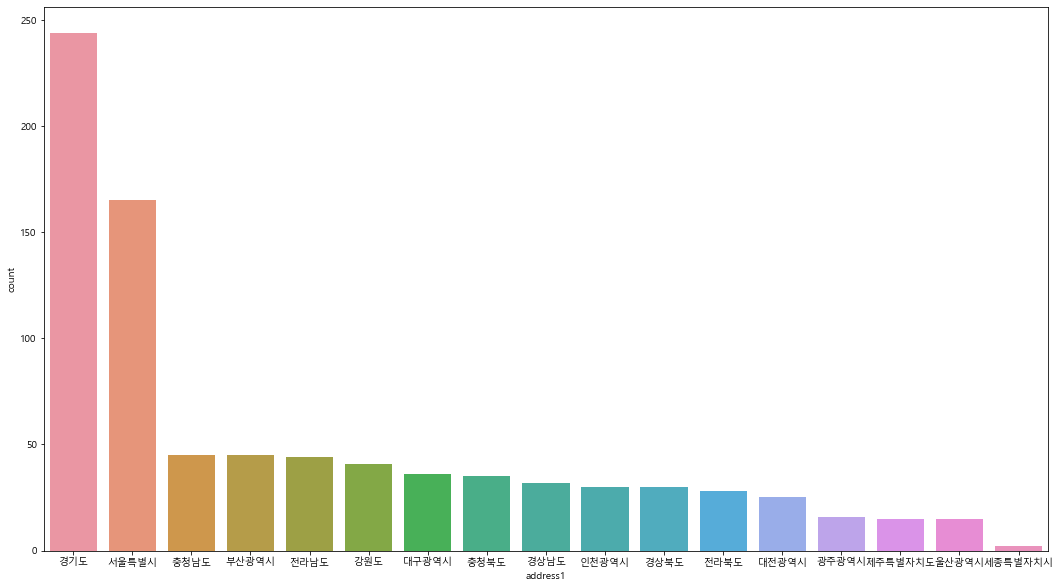

In [9]:
plt.rcParams["figure.figsize"] = (18,10)
sns.countplot(x="address1", data=total, order=total['address1'].value_counts().index)

# 2. 전국 공공도서관 확충 예정

- http://www.index.go.kr/potal/main/EachDtlPageDetail.do?idx_cd=1639

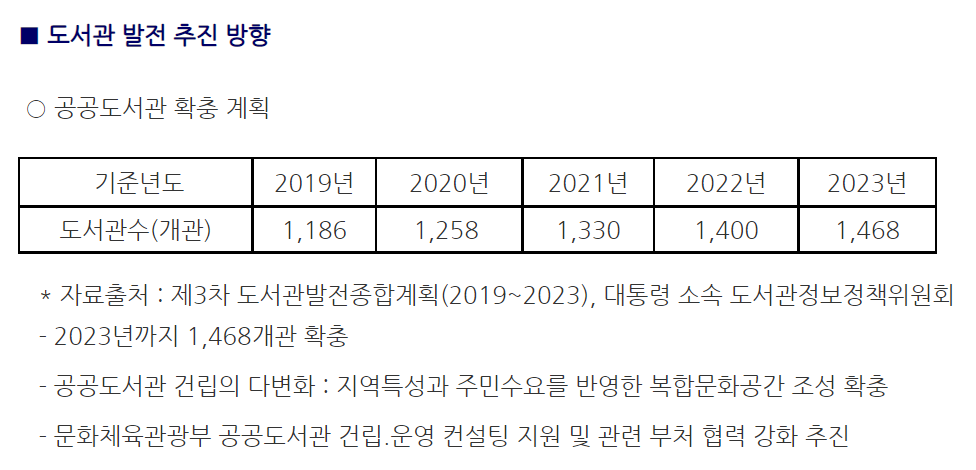

In [10]:
Image("C:/Users/user/Desktop/도서나루/도서관 확충.png")

# 3. 서울 공공도서관 개수 및 위치

- 서울 공공도서관 개수

In [11]:
print('서울시 공공 도서관', NL_CD_LIBRARY_202106[(NL_CD_LIBRARY_202106['lib_type_nm']=='공공') & (NL_CD_LIBRARY_202106['areacode1']=='서울특별시')].shape)
seoul = NL_CD_LIBRARY_202106[(NL_CD_LIBRARY_202106['lib_type_nm']=='공공') & (NL_CD_LIBRARY_202106['areacode1']=='서울특별시')]

서울시 공공 도서관 (165, 34)


<AxesSubplot:xlabel='address2', ylabel='count'>

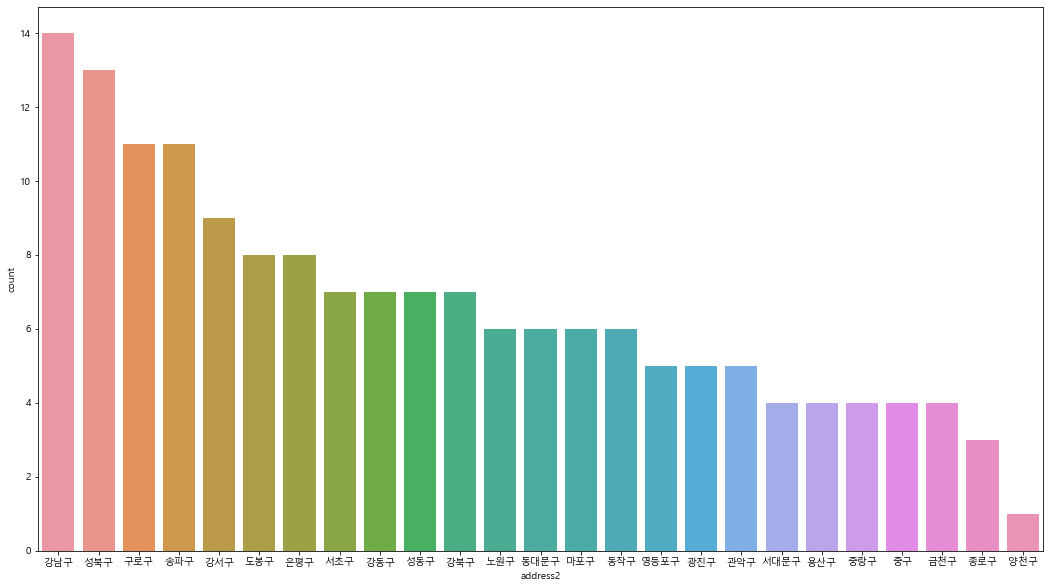

In [12]:
plt.rcParams["figure.figsize"] = (18,10)
sns.countplot(x="address2", data=seoul, order=seoul['address2'].value_counts().index)

- 서울 공공도서관 위치

In [13]:
freq_gu=seoul['address2'].value_counts()

In [14]:
# 전국 시도별 경계선 json file
geo_path='C:/Users/user/Desktop/도서나루/TL_SCCO_CTPRVN.json'
geo_str=json.load(open(geo_path,encoding='utf-8'))

In [15]:
for i in range(17):
    print(i, geo_str['features'][i]['properties']['CTP_KOR_NM'])

0 강원도
1 경기도
2 경상남도
3 경상북도
4 광주광역시
5 대구광역시
6 대전광역시
7 부산광역시
8 서울특별시
9 세종특별자치시
10 울산광역시
11 인천광역시
12 전라남도
13 전라북도
14 제주특별자치도
15 충청남도
16 충청북도


In [20]:
seoul_place = seoul[['lib_latitude', 'lib_longitude']]

In [21]:
map=folium.Map(location=[37.5102,126.982],zoom_start=11, tiles='CartodbPositron')
map.choropleth(geo_data=geo_str['features'][8], fill_color="blanchedalmond", fill_opacity=0.1, line_weight=2)

for i in range(len(seoul_place)):
#     marker = folium.Marker([seoul_place.iloc[i][0], seoul_place.iloc[i][1]],
#                             icon=folium.Icon(color='blue'))
    circle = folium.Circle(location = [seoul_place.iloc[i][0], seoul_place.iloc[i][1]], color="coral")
    circle_marker = folium.CircleMarker(location = [seoul_place.iloc[i][0], seoul_place.iloc[i][1]],
                           radius = 13, color='#ffffgg',fill_color='#fffggg')
    circle.add_to(map)
    circle_marker.add_to(map)

C:\Users\user\Anaconda3\lib\site-packages\folium\folium.py:413: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


In [22]:
map

# 4. 서울 공공도서관 불균등함

- 25개 구, 425개 행정동

In [319]:
# seoul_libry : 위도 경도를 찍어서 행정동 찾아옴 (인범)
seoul = pd.read_csv('C:/Users/user/Desktop/도서나루/seoul_libry.csv', index_col=[0])

In [305]:
# seoul_libry : 위도 경도를 찍어서 행정동 찾아옴 (인범)
hangjeongdong = pd.read_csv('C:/Users/user/Desktop/도서나루/행정동코드.csv')
hangjeongdong.head()

,시도코드,시도명칭,시군구코드,시군구명칭,읍면동코드,읍면동명칭
0,11,서울특별시,11010,종로구,1101053,사직동
1,11,서울특별시,11010,종로구,1101054,삼청동
2,11,서울특별시,11010,종로구,1101055,부암동
3,11,서울특별시,11010,종로구,1101056,평창동
4,11,서울특별시,11010,종로구,1101057,무악동


In [320]:
seoul1 = seoul[['행정동','lib_name']]
seoul1 = seoul1.groupby(seoul1['행정동']).count().reset_index()
seoul1.head()

,행정동,lib_name
0,가락1동,1
1,가산동,1
2,가양3동,1
3,강일동,1
4,개봉1동,2


In [321]:
dong_library = pd.merge(seoul1, hangjeongdong, left_on='행정동', right_on='읍면동명칭', how='right')[['읍면동명칭', 'lib_name']].fillna(0)
dong_library['lib_name'].value_counts()

0.0    282
1.0    123
2.0     18
3.0      2
Name: lib_name, dtype: int64

In [355]:
ratio = (dong_library['lib_name'].value_counts().values/dong_library['lib_name'].value_counts().values.sum()*100).round(1)
labels = ['0개', '1개', '2개' ,'3개']
explode = [0.05, 0.05, 0.05, 0.05]
colors = ['#ff9999', '#ffc000', '#8fd9b6', '#d395d0']

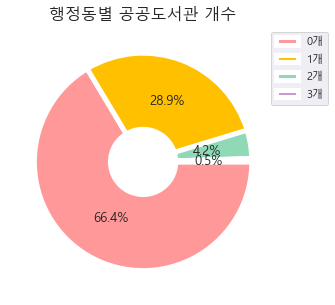

In [383]:
plt.rcParams["figure.figsize"] = (7,5)

plt.title('행정동별 공공도서관 개수', fontsize=16)
plt.pie(ratio, autopct='%.1f%%', counterclock=False, 
        colors=colors, wedgeprops=wedgeprops, textprops={'fontsize':13})
plt.legend(labels, loc='upper right', bbox_to_anchor=(1.2,1))
plt.show()